# Predicting and Generating Texts

<p>This notebook explores the idea of predicting items in a sequence, and then using those predictions to generate new sequences based on the probabilities. sdhgsf&nbsp;</p>


In [1]:
from conx import *

Using Theano backend.
conx, version 3.5.4


## EmbeddingLayer

An EmbeddingLayer allows the system to find (or use) distributed representations for words or letters. 

First, we need a method of encoding and decoding our sequenced data. We'll begin with characters.

In [2]:
def encode(s):
    """Convert string or char into integers"""
    if len(s) == 1:
        return (1 + ord(s.lower()) - ord('a')) if s.isalpha() else 0
    else:
        return cleanup([encode(c) for c in s])

def cleanup(items):
    """Remove repeated zeros"""
    retval = []
    for i in items:
        if ((i != 0) or 
            (len(retval) == 0) or 
            (retval[-1] != 0)):
            retval.append(i)
    return retval

def decode(n):
    """Convert integers into characters"""
    if isinstance(n, (list, tuple)):
        return [decode(v) for v in n]
    elif n == 0:
        return ' '
    else:
        return chr(ord('a') + int(n) - 1)

In [3]:
encode("H")

8

In [4]:
encode("Hello, world!")

[8, 5, 12, 12, 15, 0, 23, 15, 18, 12, 4, 0]

In [5]:
encode("AaaA")

[1, 1, 1, 1]

In [6]:
decode(8)

'h'

In [7]:
decode(encode("   what's     up  doc?   "))

[' ', 'w', 'h', 'a', 't', ' ', 's', ' ', 'u', 'p', ' ', 'd', 'o', 'c', ' ']

In [8]:
"".join(decode(encode("   what's     up  doc?   ")))

' what s up doc '

### Given 1 - Predict 1

Let's start out with sequence of characers of length 1. We'll just try to predict what the next character is given a single letter. We'll start with a fairly small corpus:

In [9]:
corpus = """Four score and seven years ago our fathers brought forth on this continent, 
a new nation, conceived in Liberty, and dedicated to the proposition that all men are 
created equal. Now we are engaged in a great civil war, testing whether that nation, or 
any nation so conceived and so dedicated, can long endure. We are met on a great battle-field 
of that war. We have come to dedicate a portion of that field, as a final resting place 
for those who here gave their lives that that nation might live. It is altogether fitting 
and proper that we should do this. But, in a larger sense, we can not dedicate — we can not 
consecrate — we can not hallow — this ground. The brave men, living and dead, who struggled 
here, have consecrated it, far above our poor power to add or detract. The world will little 
note, nor long remember what we say here, but it can never forget what they did here. It is 
for us the living, rather, to be dedicated here to the unfinished work which they who fought 
here have thus far so nobly advanced. It is rather for us to be here dedicated to the great 
task remaining before us — that from these honored dead we take increased devotion to that 
cause for which they gave the last full measure of devotion — that we here highly resolve that 
these dead shall not have died in vain — that this nation, under God, shall have a new birth of 
freedom — and that government of the people, by the people, for the people, shall not perish 
from the earth."""

In [10]:
"".join(decode(encode(corpus)))

'four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battle field of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we can not dedicate we can not consecrate we can not hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is rat

In [11]:
len_vocab = max(encode(corpus)) + 1
len_vocab

26

In [12]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 1):
    code = encoded_corpus[i]
    next_code = encoded_corpus[i + 1]
    dataset.append([[code], onehot(next_code, len_vocab)])

In [13]:
net = Network("Given 1 - Predict 1")
net.add(Layer("input", 1)) # sequence
net.add(EmbeddingLayer("embed", 26, 64)) # in, out
net.add(FlattenLayer("flatten"))
net.add(Layer("output", 26, activation="softmax"))
net.connect()
net.compile(error="categorical_crossentropy", optimizer="adam")

In [14]:
net.dataset.load(dataset)

In [15]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'embed', 'flatten', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

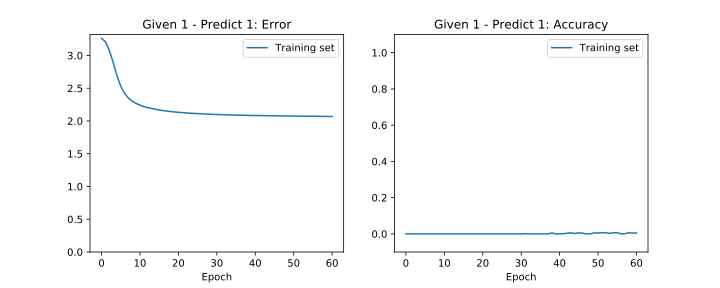

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   60 |   2.06915 |   0.00493 
Saving network... Saved!


In [17]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.train(30, accuracy=.95, plot=True, save=True)

In [18]:
def generate(net, count, len_vocab):
    retval = ""
    # start at a random point:
    inputs = choice(net.dataset.inputs)
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs)
        code = choice(len(outputs), p=outputs)
        c = decode(code)
        print(c, end="")
        retval += c
    return retval

In [19]:
generate(net, 500, len_vocab)

a cmgowolthciddvrdtdfiattdafeaaonaotfitthlwnnofoagwtuabtiafniewtcndotbnsibwatioahirawclntttafggmohycwwwnpachnfctsbltuarttteimdiolsracncniodauhgbpantottattrtathotrgrdmrsthooswosctbdnttnprwthpwtosnngtbawwoiclndfhbftfawttddaib hiwttctlatttotwotsotgtrluntgwspdntgulralctcaofndpfiffsthbhgphmtttdalwfwwhlfdnrstgiottwwtnltbgtbttwnmfwcduunuothohafttdttltafwdtwmwgwttpgaannfocfaadwpawnubnmfctcssi flwlndwstthtdshpcrattattnambtwhwmstwciligwwotowwiwiptgii stbpoimatatwwdtffnpecfptnigwnhiwgdhaldwtfnatnwwfndltwtw

'a cmgowolthciddvrdtdfiattdafeaaonaotfitthlwnnofoagwtuabtiafniewtcndotbnsibwatioahirawclntttafggmohycwwwnpachnfctsbltuarttteimdiolsracncniodauhgbpantottattrtathotrgrdmrsthooswosctbdnttnprwthpwtosnngtbawwoiclndfhbftfawttddaib hiwttctlatttotwotsotgtrluntgwspdntgulralctcaofndpfiffsthbhgphmtttdalwfwwhlfdnrstgiottwwtnltbgtbttwnmfwcduunuothohafttdttltafwdtwmwgwttpgaannfocfaadwpawnubnmfctcssi flwlndwstthtdshpcrattattnambtwhwmstwciligwwotowwiwiptgii stbpoimatatwwdtffnpecfptnigwnhiwgdhaldwtfnatnwwfndltwtw'

### Given 5 - Predict 1

In [20]:
net2 = Network("Given 5 - Predict 1")
net2.add(Layer("input", 5)) # sequence
net2.add(EmbeddingLayer("embed", 26, 64)) # in, out
net2.add(FlattenLayer("flatten"))
net2.add(Layer("output", 26, activation="softmax"))
net2.connect()
net2.compile(error="categorical_crossentropy", optimizer="adam")

In [21]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 5):
    code = encoded_corpus[i:i+5]
    next_code = encoded_corpus[i + 5]
    if len(code) == 5:
        dataset.append([code, onehot(next_code, len_vocab)])

In [22]:
net2.dataset.load(dataset)

In [23]:
for i in range(10):
    print(i, decode(net2.dataset.inputs[i]), decode(argmax(net2.dataset.targets[i])))

0 ['f', 'o', 'u', 'r', ' '] s
1 ['o', 'u', 'r', ' ', 's'] c
2 ['u', 'r', ' ', 's', 'c'] o
3 ['r', ' ', 's', 'c', 'o'] r
4 [' ', 's', 'c', 'o', 'r'] e
5 ['s', 'c', 'o', 'r', 'e']  
6 ['c', 'o', 'r', 'e', ' '] a
7 ['o', 'r', 'e', ' ', 'a'] n
8 ['r', 'e', ' ', 'a', 'n'] d
9 ['e', ' ', 'a', 'n', 'd']  


In [24]:
net2.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'embed', 'flatten', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

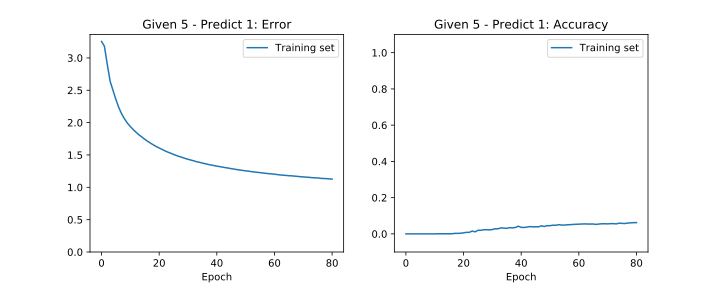

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   80 |   1.12711 |   0.06215 
Saving network... Saved!


In [25]:
if net2.saved():
    net2.load()
    net2.plot_results()
else:
    net2.train(80, accuracy=.95, plot=True, save=True)

In [26]:
def generate2(net, count, len_vocab):
    # start at a random point:
    inputs = choice(net.dataset.inputs)
    retval = "".join(decode(inputs))
    print(retval, end="")
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs)
        pickone = choice(len(outputs), p=outputs)
        inputs = inputs[1:] + [pickone]
        c = decode(pickone)
        print(c, end="")
        retval += c
    return retval

In [27]:
generate2(net2, 1000, 26)

nsecreadd dovo they and or eust faly ndvencat nivit berty ind er aby mat on that we savenged mog d ar forgho fre ho hers gather forlusgre ongheve tyearo dewill nos hath of heverg tasur tofith o thoced ioll note nono fart tagy are whe ber abor hush re car sor for shy hive ion mong wat beveit as d ouge chite ugfin us tof have these fitllor that farld goremby the peoplertyeare we the perish ro to sund id iot ould doticane canve in tho ling ghate foer ug thit aull ofot dedicerey revarg rathether gove use meate reatio thall gor fored inglinger fithe weican ne hio ghe fored that ase reaver for songoned wo thet ded cat lavin toat in to con ed and porat that fat duse wore ond onven teat at ah te sugll fofler measer ab that the propberty wer at te se dio le he herithis for ustint iond ingaly mevit canincantnot inisiblound caneld ad deverey and porithish llthat nation ane reate w ousk whicr agoredush fowl hay wed tiot do sewuth ne iond in and shall who ld as are osever for hove died ar iong wher

'nsecreadd dovo they and or eust faly ndvencat nivit berty ind er aby mat on that we savenged mog d ar forgho fre ho hers gather forlusgre ongheve tyearo dewill nos hath of heverg tasur tofith o thoced ioll note nono fart tagy are whe ber abor hush re car sor for shy hive ion mong wat beveit as d ouge chite ugfin us tof have these fitllor that farld goremby the peoplertyeare we the perish ro to sund id iot ould doticane canve in tho ling ghate foer ug thit aull ofot dedicerey revarg rathether gove use meate reatio thall gor fored inglinger fithe weican ne hio ghe fored that ase reaver for songoned wo thet ded cat lavin toat in to con ed and porat that fat duse wore ond onven teat at ah te sugll fofler measer ab that the propberty wer at te se dio le he herithis for ustint iond ingaly mevit canincantnot inisiblound caneld ad deverey and porithish llthat nation ane reate w ousk whicr agoredush fowl hay wed tiot do sewuth ne iond in and shall who ld as are osever for hove died ar iong whe

## LSTMLayer



### Many to One Model

In [28]:
net3 = Network("LSTM - Many to One")
net3.add(Layer("input", 40)) # sequence length
net3.add(EmbeddingLayer("embed", 26, 64)) # sequence_length from input
net3.add(LSTMLayer("lstm", 64))
net3.add(Layer("output", 26, activation="softmax"))
net3.connect()
net3.compile(loss='categorical_crossentropy', optimizer='adam')

In [29]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 40):
    code = encoded_corpus[i:i+40]
    next_code = encoded_corpus[i + 40]
    if len(code) == 40:
        dataset.append([code, onehot(next_code, len_vocab)])

In [30]:
net3.dataset.load(dataset)

In [31]:
net3.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'embed', 'lstm', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [32]:
net3.propagate(net3.dataset.inputs[0])

[0.03867553547024727,
 0.03810815140604973,
 0.03814312443137169,
 0.038487743586301804,
 0.03873595967888832,
 0.03833826258778572,
 0.038370247930288315,
 0.03853295370936394,
 0.038604699075222015,
 0.03884882479906082,
 0.038607388734817505,
 0.03871150687336922,
 0.03818392753601074,
 0.038065105676651,
 0.038362279534339905,
 0.038470663130283356,
 0.03881986811757088,
 0.03834901377558708,
 0.03806377574801445,
 0.03887565806508064,
 0.03862516209483147,
 0.038401052355766296,
 0.03861922398209572,
 0.038313861936330795,
 0.03869953751564026,
 0.03798647224903107]

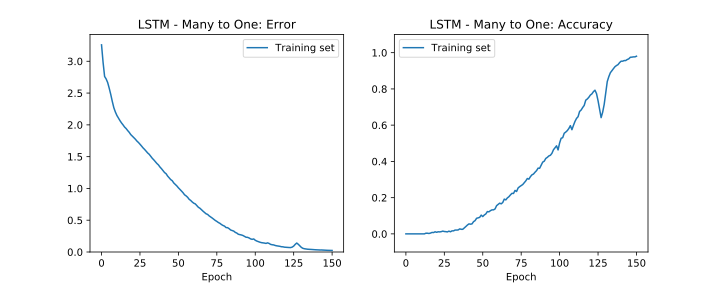

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  150 |   0.02411 |   0.98045 
Saving network... Saved!


In [33]:
if net3.saved():
    net.load()
    net.plot_results()
else:
    net3.train(150, plot=True, save=True)

In [34]:
def generate3(net, count, len_vocab):
    # start with a full sentence:
    inputs = choice(net.dataset.inputs)
    print("".join(decode(inputs)), end="")
    for i in range(count):
        outputs = net.propagate(inputs)
        pickone = choice(len(outputs), p=outputs)
        inputs = inputs[1:] + [pickone]
        print(decode(pickone), end="")

In [35]:
generate3(net3, 500, len_vocab)

f freedom and that government of the people by the people for the people shall not perish from the yher thall not have fios this bather for who broushy deivent dead whre gavt in libur thestingh thath they who ushe for the people b the bith for sest hengean tinl largew we gae hercon that cave coveit is fort of their beres that cane not in a lare nencingered we a near canngeacre we edtake we agtrecr weacre wew ot astr gancses that to nbould on ofer pottiches whethe what feo she liven nation shalt whiol thall for thall wigh they have fom

## Many to Many LSTM


In [36]:
net4 = Network("Many-to-Many LSTM")
net4.add(Layer("input", None)) # None for variable number 
net4.add(EmbeddingLayer("embed", 26, 64))
net4.add(LSTMLayer("lstm", 256, return_sequences=True)) # , stateful=True
net4.add(Layer("output", 26, activation='softmax', time_distributed=True))
net4.connect()
net4.compile(error="categorical_crossentropy", optimizer="adam")
net4.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None)              0         
_________________________________________________________________
embed (Embedding)            (None, None, 64)          1664      
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         328704    
_________________________________________________________________
output (TimeDistributed)     (None, None, 26)          6682      
Total params: 337,050
Trainable params: 337,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
dataset = []
encoded_corpus = ([0] * 39) + encode(corpus)
for i in range(len(encoded_corpus) - 40):
    code = encoded_corpus[i:i+40]
    next_code = encoded_corpus[i+1:i+40+1]
    if len(code) == 40:
        dataset.append([code, list(map(lambda n: onehot(n, len_vocab), next_code))])

In [38]:
shape(dataset[0][1])

(40, 26)

In [39]:
net4.dataset.load(dataset)

In [40]:
net4.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'embed', 'lstm', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [41]:
net4.propagate([13])

[0.03841586038470268,
 0.03841104358434677,
 0.03821592032909393,
 0.03843912109732628,
 0.03838231787085533,
 0.03839215263724327,
 0.038437046110630035,
 0.038439054042100906,
 0.038504477590322495,
 0.03843025863170624,
 0.03833326697349548,
 0.038275402039289474,
 0.03862737491726875,
 0.03831815719604492,
 0.03863891586661339,
 0.03851468116044998,
 0.038503922522068024,
 0.03852369263768196,
 0.03838068246841431,
 0.038425568491220474,
 0.03850192576646805,
 0.03870881721377373,
 0.03856681287288666,
 0.038576263934373856,
 0.0386258140206337,
 0.0384114533662796]

In [42]:
net4.propagate([13, 21])

[[0.03841586038470268,
  0.03841104358434677,
  0.03821592032909393,
  0.03843912109732628,
  0.03838231787085533,
  0.03839215263724327,
  0.038437046110630035,
  0.038439054042100906,
  0.038504477590322495,
  0.03843025863170624,
  0.03833326697349548,
  0.038275402039289474,
  0.03862737491726875,
  0.03831815719604492,
  0.03863891586661339,
  0.03851468116044998,
  0.038503922522068024,
  0.03852369263768196,
  0.03838068246841431,
  0.038425568491220474,
  0.03850192576646805,
  0.03870881721377373,
  0.03856681287288666,
  0.038576263934373856,
  0.0386258140206337,
  0.0384114533662796],
 [0.038474190980196,
  0.0385461263358593,
  0.03825546056032181,
  0.03847527876496315,
  0.03846961259841919,
  0.03876793012022972,
  0.03839487582445145,
  0.038508519530296326,
  0.038533519953489304,
  0.038337189704179764,
  0.038298796862363815,
  0.038473691791296005,
  0.038438230752944946,
  0.03839125484228134,
  0.0384674035012722,
  0.03859785199165344,
  0.03839674964547157,
  0

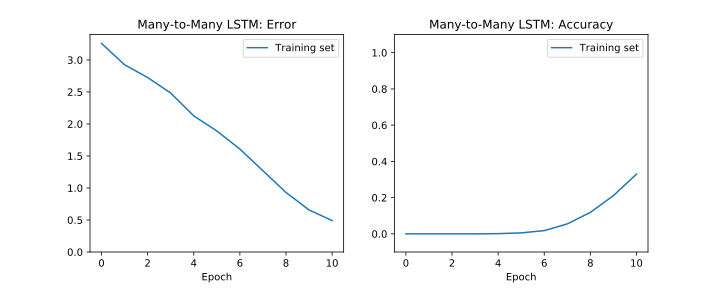

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   10 |   0.49105 |   0.32975 


In [43]:
net4.train(10, plot=True)

In [44]:
def generate4(net, count, len_vocab):
    letters = [choice(len_vocab)] # choose a random letter
    for i in range(count):
        print(decode(letters[-1]), end="")
        outputs = net.propagate(letters)
        if len(shape(outputs)) == 1:
            p = outputs
        else:
            p = outputs[-1]
        letters.append(choice(len(p),p=p))
        letters = letters[-40:]

In [45]:
generate4(net4, 500, len_vocab)

qoflest of that disher fiol to tha l nation mendicbatled  a se nan not or conpiond father whith they wa they nation ur anger soncond it ia rerey bat deis van ndase deve tiis wor anve mer at ib fare deas we wir grome to he here ig dicat in last an proper to that dediabl hothith un fremas noblld asve forget hathe tho ge asd croll aave nise hive mir lattion matedicate we ag to tha l foul the rave thus far the lave nor meand devatico the and in berer and wedicated cat on concend ibl poret os here do

<IPython.core.display.Javascript object>


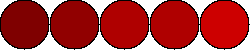

In [46]:
net4.snapshot(range(5))

<IPython.core.display.Javascript object>

<Network name='Many-to-Many LSTM' (compiled)>
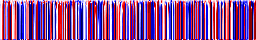
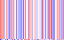

In [47]:
net4

In [48]:
output = net4.propagate(range(4))

In [49]:
shape(net4.dataset.inputs[43:47])

(4, 40)